In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_s=pd.read_csv('heros.csv',encoding='gb18030')
features=data_s.columns[1:21]
data=data_s[features]
data.head()

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战
1,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战
2,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战
3,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,14.00%,近战
4,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,14.00%,近战


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 20 columns):
最大生命       69 non-null int64
生命成长       69 non-null float64
初始生命       69 non-null int64
最大法力       69 non-null int64
法力成长       69 non-null int64
初始法力       69 non-null int64
最高物攻       69 non-null int64
物攻成长       69 non-null float64
初始物攻       69 non-null int64
最大物防       69 non-null int64
物防成长       69 non-null float64
初始物防       69 non-null int64
最大每5秒回血    69 non-null int64
每5秒回血成长    69 non-null float64
初始每5秒回血    69 non-null int64
最大每5秒回蓝    69 non-null int64
每5秒回蓝成长    69 non-null float64
初始每5秒回蓝    69 non-null int64
最大攻速       69 non-null object
攻击范围       69 non-null object
dtypes: float64(5), int64(13), object(2)
memory usage: 10.9+ KB


In [4]:
plt.rcParams['font.sans-serif']=['Heiti TC']
plt.rcParams['axes.unicode_minus']=False

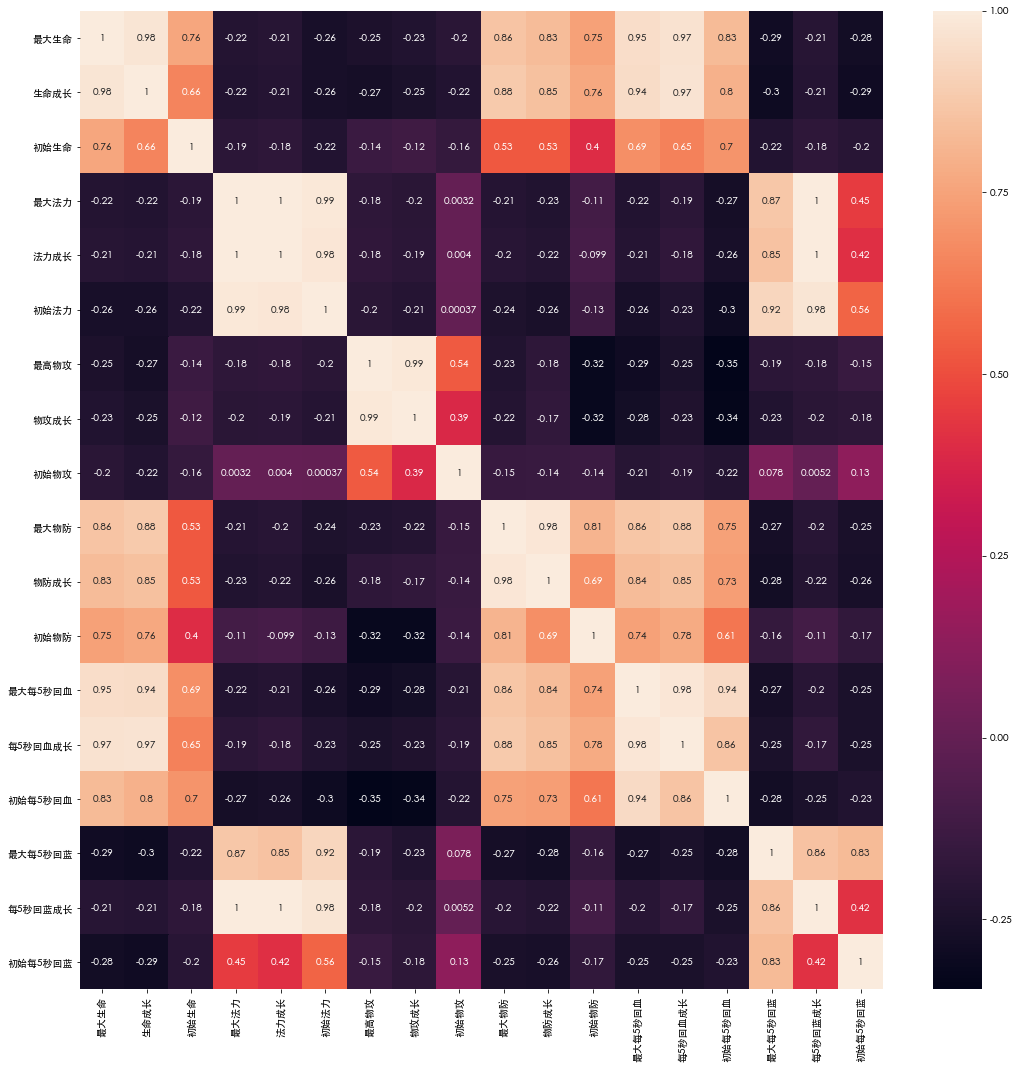

In [5]:
corr=data[features].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True)

In [6]:
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_s[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})

In [7]:
ss=StandardScaler()
data=ss.fit_transform(data)

In [8]:
gmm=GaussianMixture(n_components=30,covariance_type='full')
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=30, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [9]:
prediction=gmm.predict(data)

In [10]:
prediction

array([ 9,  9,  8,  3, 12, 12, 18,  8, 28,  7, 15, 27,  3, 14, 24, 15, 19,
        3,  6, 17, 16,  5, 17,  5,  5,  5, 17, 11,  2, 23,  9, 23, 13,  2,
       23, 23,  2,  4, 21, 10, 13,  2,  2, 23, 23, 13, 27, 21, 27,  2, 20,
        1,  6, 14, 14,  9, 29,  1, 25, 12, 29,  6,  0,  9, 22,  1,  1, 26,
       11])

In [11]:
from sklearn.metrics import calinski_harabasz_score
score=calinski_harabasz_score(data,prediction)
print(score)

20.83966937429612


指标分数越高，代表聚类效果越好，也就是相同类中的差异性小，不同类之间的差异性大。当然具体聚类的结果含义，我们需要人工来分析，也就是当这些数据被分成不同的类别之后，具体每个类表代表的含义。

In [12]:
data_s.insert(0,'分组',prediction)
data_s.to_csv('heros_out.csv',index=False,sep=',')